## Name entity recognition

# Author: Hok Seng

<p>
    <b>Notebook Sections</b><br>
    This notebook is divided into the following sections:
    <ul>
        <li>A. Setting Environment</li>
        <li>B. Set the Devic (cpu or mps) </li>
    </ul>
</p>

In [1]:
! git clone https://github.com/senghok510/code.git

Cloning into 'code'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 53 (delta 4), reused 13 (delta 0), pack-reused 29 (from 1)
Receiving objects: 100% (53/53), 73.23 MiB | 21.47 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [2]:
import os
import subprocess
import requests
import logging
os.getcwd()

'/content'

## Download necessary packages

In [ ]:
# with open("requirement.txt", "r") as file:
#     for f in file.readlines():
#         package = f.strip()
#         if package:
#             subprocess.check_call(["pip", "install", package])
#             %pip install {package}

## Import necessary packages

In [ ]:


# save_dir = "data"
# os.makedirs(save_dir,exist_ok = True)

# file_name = os.path.join(save_dir,"NER_dataset.csv")

# response = requests.get(url,stream = True)


# if response.status_code == 200:
#     with open(file_name,"wb") as file:
#         for chunk in response.iter_content(chunk_size=1024):
#             file.write(chunk)
#     print(f"File downloaded successfully and saved to {file_name}")
# else:
#     print(f"Failed to download file. Status code: {response.status_code}")



In [3]:
! pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 114.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 66.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 re

In [1]:
from gensim.models import Word2Vec

In [3]:
import numpy as np
import pandas as pd
from collections import Counter
from nltk.tokenize import word_tokenize
import seaborn as sns
import collections
from itertools import chain
import random
import copy
import itertools
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
from sklearn.preprocessing import MultiLabelBinarizer
# from skmultilearn.model_selection import iterative_train_test_split

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import RandomSampler, SequentialSampler
from torch.utils.data import TensorDataset, random_split
from torch.optim import AdamW
from torch.nn.utils.rnn import pad_sequence
from transformers import BertTokenizer
from transformers import BertForTokenClassification
from transformers import get_linear_schedule_with_warmup

import matplotlib.pyplot as plt
import seaborn as sns
from torch.autograd import Variable
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from torch.nn import Embedding
from torch.nn import LSTM


# set the option to display all columns
pd.set_option('display.max_columns', None)

In [4]:
%cd /content/code

/content/code


### Import clean data

In [5]:
train_df = pd.read_csv('./data/train.csv')
valid_df = pd.read_csv('./data/valid.csv')
test_df = pd.read_csv('./data/test.csv')

In [6]:

print(f"Train Dataset size: {len(train_df)}")
print(f"Valid Data Size: {len(valid_df)}")

Train Dataset size: 34279
Valid Data Size: 3808


In [7]:

print("TRAIN Dataset: {}".format(train_df.shape))
print("VALID Dataset: {}".format(valid_df.shape))
print("TEST Dataset: {}".format(test_df.shape))

TRAIN Dataset: (34279, 2)
VALID Dataset: (3808, 2)
TEST Dataset: (9520, 2)


In [8]:
train_df.head()

,sentence,labels
0,Families of soldiers killed in the conflict jo...,"O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,B-per,O,O,..."
1,"Police put the number of marchers at 10,000 wh...","O,O,O,O,O,O,O,O,O,O,O,O,O,O,O"
2,The party is divided over Britain 's participa...,"O,O,O,O,O,B-gpe,O,O,O,O,B-geo,O,O,O,O,O,O,O,B-..."
3,Two Germans and four Nigerian oil workers were...,"O,B-gpe,O,O,B-gpe,O,O,O,O,O,O,O,O,O,O,O,O,O,O,..."
4,The German firm works as a sub-contractor for ...,"O,B-gpe,O,O,O,O,O,O,B-org,O"


In [9]:
train_df["labels"].iloc[3]

'O,B-gpe,O,O,B-gpe,O,O,O,O,O,O,O,O,O,O,O,O,O,O,B-geo,O,O,O,B-geo,O,O'

In [10]:
train_df["sentence"].iloc[3]

"Two Germans and four Nigerian oil workers were kidnapped by armed militants during a raid on a boat in Nigeria 's southern oil-rich Delta region ."

In [11]:
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [12]:
train_df.head(3)

,sentence,labels
0,Families of soldiers killed in the conflict jo...,"O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,B-per,O,O,..."
1,"Police put the number of marchers at 10,000 wh...","O,O,O,O,O,O,O,O,O,O,O,O,O,O,O"
2,The party is divided over Britain 's participa...,"O,O,O,O,O,B-gpe,O,O,O,O,B-geo,O,O,O,O,O,O,O,B-..."


In [13]:
all_labels = train_df['labels'].apply(lambda x: x.split(','))
all_labels = sorted(set(label for labels in all_labels for label in labels ))
all_labels

['B-geo',
 'B-gpe',
 'B-org',
 'B-per',
 'B-tim',
 'I-geo',
 'I-org',
 'I-per',
 'I-tim',
 'O']

### One hot encoding for all the labels in training , validation and testing dataset

In [ ]:

# Step 2: Initialize the MultiLabelBinarizer with all known classes
mlb = MultiLabelBinarizer(classes=sorted(all_labels))
# Step 3: Transform per-sentence label sets
unique_train_labels_ohe = mlb.fit_transform(
    train_df['labels'].apply(lambda x: set(x.split(',')))
)

In [ ]:
unique_train_labels_ohe.shape

(34279, 10)

In [ ]:


# Validation
unique_valid_labels_ohe = mlb.transform(
    valid_df['labels'].apply(lambda x: set(x.split(',')))
)

# Testing
unique_test_labels_ohe = mlb.transform(
    test_df['labels'].apply(lambda x: set(x.split(',')))
)


In [ ]:
# compute number of samples
num_train_samples = unique_train_labels_ohe.shape[0]
num_valid_samples = unique_valid_labels_ohe.shape[0]
num_test_samples = unique_test_labels_ohe.shape[0]

# compute number of samples for each unique label
train_labels_count = unique_train_labels_ohe.sum(axis=0)
valid_labels_count = unique_valid_labels_ohe.sum(axis=0)
test_labels_count = unique_test_labels_ohe.sum(axis=0)

# compute proportion of samples for each unique label
prop_train_labels = train_labels_count/num_train_samples
prop_valid_labels = valid_labels_count/num_valid_samples
prop_test_labels = test_labels_count/num_test_samples


print("Training Data")
print("==============")
print(f"Total num of training samples: {num_train_samples}")
print(f"Total num of each label: {train_labels_count}")
print(f"Proportions of each label: {prop_train_labels}\n")

print("Validation Data")
print("==============")
print(f"Total num of validation samples: {num_valid_samples}")
print(f"Total num of each label: {valid_labels_count}")
print(f"Proportions of each label: {prop_valid_labels}\n")

print("Testing Data")
print("===============")
print(f"Total num of training samples: {num_test_samples}")
print(f"Total num of each label: {test_labels_count}")
print(f"Proportions of each label: {prop_test_labels}")

NameError: name 'unique_valid_labels_ohe' is not defined

### Create the proportion dataFrame for training, validation and testing data

In [14]:
label2id = {k:v+1 for v,k in enumerate(all_labels)}
id2label = {k+1:v for k,v in enumerate(all_labels)}

In [ ]:
# create dict for proportions of each label
prop_data = {
    'labels' : list(label2id.keys()),
    'train' : prop_train_labels,
    'valid' : prop_valid_labels,
    'test' : prop_test_labels
}


prop_df = pd.DataFrame.from_dict(prop_data)


display(prop_df)

In [ ]:
# fig, ax = plt.subplots(figsize=(10, 8))
# g = sns.barplot(
#     data=prop_df.melt(id_vars = ["labels"], value_vars=["train", "valid", "test"]),
#     y="value", x="v
#
#
#
# ariable", hue="labels", errorbar=None
# )

# # for legend text
# plt.setp(g.get_legend().get_texts(), fontsize='10')

# # for legend title
# plt.setp(g.get_legend().get_title(), fontsize='10')
# plt.title("Proportions of sentences containing each label - training, validation and testing dataset")
# plt.savefig('./images/label_proportions.png', bbox_inches='tight', dpi=300)
# plt.show()

### Check distributions of 2nd order

In [ ]:
# from collections import Counter
# from skmultilearn.model_selection.measures import get_combination_wise_output_matrix

# label_combination_df = pd.DataFrame({
#     'train': Counter(str(combination) for row in get_combination_wise_output_matrix(unique_train_labels_ohe, order=2) for combination in row),
#     'valid': Counter(str(combination) for row in get_combination_wise_output_matrix(unique_valid_labels_ohe, order=2) for combination in row),
#     'test' : Counter(str(combination) for row in get_combination_wise_output_matrix(unique_test_labels_ohe, order=2) for combination in row),
# }).T.fillna(0.0).astype('float')

# # compute proportions
# label_combination_df.loc['train'] = label_combination_df.loc['train']/num_train_samples
# label_combination_df.loc['valid'] = label_combination_df.loc['valid']/num_valid_samples
# label_combination_df.loc['test'] = label_combination_df.loc['test']/num_test_samples

# label_combination_df

In [ ]:
# from collections import Counter
# from skmultilearn.model_selection.measures import get_combination_wise_output_matrix

# label_combination_df = pd.DataFrame({
#     'train': Counter(str(combination) for row in get_combination_wise_output_matrix(unique_train_labels_ohe, order=3) for combination in row),
#     'valid': Counter(str(combination) for row in get_combination_wise_output_matrix(unique_valid_labels_ohe, order=3) for combination in row),
#     'test' : Counter(str(combination) for row in get_combination_wise_output_matrix(unique_test_labels_ohe, order=3) for combination in row),
# }).T.fillna(0.0).astype('float')

# # compute proportions
# label_combination_df.loc['train'] = label_combination_df.loc['train']/num_train_samples
# label_combination_df.loc['valid'] = label_combination_df.loc['valid']/num_valid_samples
# label_combination_df.loc['test'] = label_combination_df.loc['test']/num_test_samples

# label_combination_df

### Baseline model
### RNN + Softmax

### Tokenization
There are many tokenization methods  including:
<li>
Bert Tokenizer
</li>
<li>
Byte-Pair Encoding (BPE) - Robust to unknown words
</li>

### Word tokenization

In [15]:
# Tokenize sentences (whitespace)
def tokenize(sentence):
    return sentence.strip().split()
# Split labels
def split_labels(label_str):
    return label_str.strip().split(',')


In [16]:

train_df['tokens'] = train_df['sentence'].apply(tokenize)
train_df['label_list'] = train_df['labels'].apply(split_labels)

In [17]:
train_df[train_df["tokens"].apply(len) >50]



,sentence,labels,tokens,label_list
600,The visit by Assistant Secretary of State for ...,"O,O,O,O,O,O,B-org,I-org,I-org,I-org,I-org,I-or...","[The, visit, by, Assistant, Secretary, of, Sta...","[O, O, O, O, O, O, B-org, I-org, I-org, I-org,..."
635,Strong performances in construction and manufa...,"O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,...","[Strong, performances, in, construction, and, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
803,After failing in the Korean War ( 1950 - 53 ) ...,"O,O,O,O,O,O,O,B-tim,I-tim,I-tim,O,O,O,O,B-geo,...","[After, failing, in, the, Korean, War, (, 1950...","[O, O, O, O, O, O, O, B-tim, I-tim, I-tim, O, ..."
1140,"Former U.S. Marine General John J. "" Jack "" Sh...","O,B-org,I-org,I-org,B-per,I-per,I-per,I-per,I-...","[Former, U.S., Marine, General, John, J., "", J...","[O, B-org, I-org, I-org, B-per, I-per, I-per, ..."
4348,But the Honest Man explained that as he was me...,"O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,...","[But, the, Honest, Man, explained, that, as, h...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
...,...,...,...,...
30696,Mourners and officials of the Socialist Party ...,"O,O,O,O,O,B-org,I-org,O,O,B-per,O,O,O,O,O,O,O,...","[Mourners, and, officials, of, the, Socialist,...","[O, O, O, O, O, B-org, I-org, O, O, B-per, O, ..."
30796,In an interview broadcast Sunday on U.S. telev...,"O,O,O,O,B-tim,O,B-geo,O,O,O,B-org,O,O,O,O,O,B-...","[In, an, interview, broadcast, Sunday, on, U.S...","[O, O, O, O, B-tim, O, B-geo, O, O, O, B-org, ..."
32287,Following its heyday as a global maritime powe...,"O,O,O,O,O,O,O,O,O,O,B-tim,I-tim,I-tim,O,O,B-pe...","[Following, its, heyday, as, a, global, mariti...","[O, O, O, O, O, O, O, O, O, O, B-tim, I-tim, I..."
32874,"Renewed activity in the mining sector , the so...","O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,B-geo,O,O,O,O,O,...","[Renewed, activity, in, the, mining, sector, ,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


### ID tokenization

### We can use Text vectorization

# Text vectorization consiste of parts:
<li>
    Standardization
</li>
<li>
    Tokenization
</li>
<li>
    Vocabulary building
</li>

### Vocabulary

### Necessary dictionaries for encoding and decoding phase

In [18]:

label2id = {k:v+1 for v,k in enumerate(all_labels)}
id2label = {k+1:v for k,v in enumerate(all_labels)}

In [19]:
label2id["<PAD>"] = 0

In [20]:
label2id

{'B-geo': 1,
 'B-gpe': 2,
 'B-org': 3,
 'B-per': 4,
 'B-tim': 5,
 'I-geo': 6,
 'I-org': 7,
 'I-per': 8,
 'I-tim': 9,
 'O': 10,
 '<PAD>': 0}

In [21]:
word_counts = Counter(word for tokens in train_df['tokens'] for word in tokens)
word2id = {word: i + 2 for i, word in enumerate(word_counts)} # turn words into unique ids (+2) because give 0,1 to UNK and PAD

In [22]:
id2word = {i+2:word for i,word in enumerate(word_counts)}


### Add '<PAD>' to use when padding and '<UNK>' in the case where there are unknown entities

In [23]:
word2id['<PAD>'] = 0
word2id['<UNK>'] = 1

In [ ]:
fallback = '<UNK>'
fallback_id = word2id.get('B-gpe', list(label2id.values())[0])  ## get idea of a word

fallback_id

1

In [ ]:
pad_token = '<PAD>'
pad_id = label2id.get(pad_token, list(label2id.values())[0])
pad_id

0

In [24]:
MAX_LEN = 40

def encode(tokens, vocab, pad_len=40, fallback='<UNK>', pad_token='<PAD>'):
    """
    Encodes a list of tokens using a vocabulary.

    - tokens: List[str] → tokens or labels (e.g., words or NER tags)
    - vocab: dict → maps token to index
    - pad_len: int → fixed output length (pad or truncate)
    - fallback: str → token to use if one isn't found (only relevant for input)
    - pad_token: str → token to use for padding

    Returns: List[int] of length `pad_len`
    """
    fallback_id = vocab.get(fallback, 0)     # Use <UNK> if token not found
    pad_id = vocab.get(pad_token, 0)         # Use <PAD> for padding

    # Map each token to its ID
    ids = [vocab.get(tok, fallback_id) for tok in tokens]

    # Truncate or pad to fixed length
    if len(ids) > pad_len:
        return ids[:pad_len]
    else:
        return ids + [pad_id] * (pad_len - len(ids))


In [25]:
X = np.array([encode(tokens, word2id, fallback='<UNK>', pad_token='<PAD>') for tokens in train_df['tokens']])
y = np.array([encode(labels, label2id, fallback='O', pad_token= '<PAD>') for labels in train_df['label_list']])
vocab_size = len(word2id)
label_size = len(label2id)


In [26]:
X[0]

array([ 2,  3,  4,  5,  6,  7,  8,  9,  7, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 18, 23, 18, 24,  7, 25, 26, 18,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0])

In [27]:
## Example:
sentence = train_df['tokens'][2]
label    = train_df['label_list'][2]
encoded_sentence = encode(sentence,word2id,fallback= '<UNK>', pad_token = '<PAD>')
encoded_label  = encode(label, label2id, fallback = 'O', pad_token = '<PAD>')
print(f"Sentence : {sentence} with length {len(sentence)}\n",
       f"encoded sentence : {encoded_sentence} with length {len(encoded_sentence)}\n")

print(f"Label : {label} with length {len(label)}\n",
       f"encoded label : {encoded_label} with length {len(encoded_label)}")

Sentence : ['The', 'party', 'is', 'divided', 'over', 'Britain', "'s", 'participation', 'in', 'the', 'Iraq', 'conflict', 'and', 'the', 'continued', 'deployment', 'of', '8,500', 'British', 'troops', 'in', 'that', 'country', '.'] with length 24
 encoded sentence : [39, 40, 41, 42, 43, 44, 45, 46, 6, 7, 47, 8, 23, 7, 48, 49, 3, 50, 51, 52, 6, 53, 54, 26, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] with length 40

Label : ['O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'O', 'O', 'O', 'O'] with length 24
 encoded label : [10, 10, 10, 10, 10, 2, 10, 10, 10, 10, 1, 10, 10, 10, 10, 10, 10, 10, 2, 10, 10, 10, 10, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] with length 40


In [28]:

id2word = {v:k for k,v in word2id.items()}
# Decode the sentence
decoded_sentence = [id2word.get(word_id, '<UNK>') for word_id in encoded_sentence]
decoded_sentence

['The',
 'party',
 'is',
 'divided',
 'over',
 'Britain',
 "'s",
 'participation',
 'in',
 'the',
 'Iraq',
 'conflict',
 'and',
 'the',
 'continued',
 'deployment',
 'of',
 '8,500',
 'British',
 'troops',
 'in',
 'that',
 'country',
 '.',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>']

In [29]:
## Convert to sentence with masked entity
sentence_masked = []
for index, lab in enumerate(label):
    if lab == 'O':
        sentence_masked.append(sentence[index])
    else:
        sentence_masked.append(label[index])
sentence_masked

['The',
 'party',
 'is',
 'divided',
 'over',
 'B-gpe',
 "'s",
 'participation',
 'in',
 'the',
 'B-geo',
 'conflict',
 'and',
 'the',
 'continued',
 'deployment',
 'of',
 '8,500',
 'B-gpe',
 'troops',
 'in',
 'that',
 'country',
 '.']

In [30]:
print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (34279, 40), y shape: (34279, 40)


In [31]:
vocab_size,label_size

(30523, 11)

In [32]:
valid_df

,sentence,labels
0,They marched from the Houses of Parliament to ...,"O,O,O,O,O,O,O,O,O,O,O,B-geo,I-geo,O"
1,The International Atomic Energy Agency is to h...,"O,B-org,I-org,I-org,I-org,O,O,O,O,O,O,O,O,B-ge..."
2,"The European Union , with U.S. backing , has t...","O,B-org,I-org,O,O,B-gpe,O,O,O,O,O,O,B-gpe,O,O,..."
3,Militant groups frequently attack oil operatio...,"O,O,O,O,O,O,O,O,B-geo,I-geo,O,O,O,O,O,O,O,O,O,..."
4,The attacks occurred after the government said...,"O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,B-gpe,..."
...,...,...
3803,Aircraft also struck a building allegedly used...,"B-org,O,O,O,O,O,O,O,O,O,O,O,O"
3804,One Hamas militant was reported killed and two...,"O,B-org,O,O,O,O,O,O,O,O,O,O"
3805,"Media reports say Ford will cut 25,000 or more...","O,O,O,B-org,O,O,O,O,O,O,O,O,O,B-tim,I-tim,I-ti..."
3806,The powerful Muslim Brotherhood Movement based...,"O,O,B-org,I-org,I-org,O,O,O,O,O,O,O,O,O,O,O,O,..."


In [33]:
# Tokenize sentences and split labels
for df in [valid_df, test_df]:
    df['tokens'] = df['sentence'].apply(lambda x: x.strip().split())
    df['label_list'] = df['labels'].apply(lambda x: x.strip().split(','))
X_valid = np.array([
    encode(tokens, word2id, fallback='<UNK>', pad_token='<PAD>')
    for tokens in valid_df['tokens']
])

y_valid = np.array([
    encode(labels, label2id, fallback='O', pad_token='O')
    for labels in valid_df['label_list']
])
X_test = np.array([
    encode(tokens, word2id, fallback='<UNK>', pad_token='<PAD>')
    for tokens in test_df['tokens']
])
y_test = np.array([
    encode(labels, label2id, fallback='O', pad_token='O')
    for labels in test_df['label_list']
])


In [34]:
print(f"Shape of Training Data (X, y): {X.shape}, {y.shape}")
print(f"Shape of Validation Data (X_valid, y_valid): {X_valid.shape}, {y_valid.shape}")
print(f"Shape of Test Data (X_test, y_test): {X_test.shape}, {y_test.shape}")

Shape of Training Data (X, y): (34279, 40), (34279, 40)
Shape of Validation Data (X_valid, y_valid): (3808, 40), (3808, 40)
Shape of Test Data (X_test, y_test): (9520, 40), (9520, 40)


In [35]:
X = torch.from_numpy(X)
y = torch.from_numpy(y)
X_valid = torch.from_numpy(X_valid)
y_valid = torch.from_numpy(y_valid)
X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(y_test)

In [36]:
X.shape

torch.Size([34279, 40])

### Embedding Layer

### Baseline model

In [37]:
class NERDataset(Dataset):
    def __init__(self,X_tensor,y_tensor,lengths):
        self.X = X_tensor
        self.y = y_tensor
        self.lengths = lengths
        assert len(self.X) == len(self.y) == len(self.lengths), \
            "X, y and lengths must all have the same number of samples"

    def __len__(self):
        return self.X.size(0)
    def __getitem__(self,idx):
        return torch.tensor(self.X[idx],dtype= torch.long), \
                torch.tensor(self.y[idx], dtype = torch.long),\
                torch.tensor(self.lengths[idx], dtype = torch.long)
#pack individual examples into a single batch
def collate_fn(batch):
    tokens, tags,lengths= zip(*batch)
    tokens = torch.stack(tokens)
    tags = torch.stack(tags)
    lengths = torch.stack(lengths)
    return tokens, tags, lengths


### For debugging

In [38]:
from IPython.core.debugger import set_trace
import pdb
import tqdm

### Parameters

In [39]:
PAD_IDX = label2id['<PAD>']   # 0
VOCAB_SIZE = vocab_size  # 30523
TAGSET_SIZE = len(label2id)
BATCH_SIZE = 32
NUM_EPOCHS = 10
learning_rate = 0.001

#orignal length sequence:


In [6]:
import torch

In [7]:
class BiLSTMTagger(torch.nn.Module):
    def __init__(self,
                 tagset_size: int,
                 embedding_dim: int = 200,
                 hidden_dim: int = 128,
                 num_layers: int = 1,
                 dropout: float = 0.3,
                 pad_idx: int = 0):  #pad_idx = vocab["<pad>"]
        super().__init__()  # python 3+ , if python 2+ then , super(BiLSTMTagger,self)

        self.embedding = nn.Embedding(VOCAB_SIZE, embedding_dim, padding_idx=pad_idx)
        self.lstm = nn.LSTM(
            input_size=embedding_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            bidirectional=True,  ## hidden backward + hidden forward (h_tf+ h_tb)  # single then remove 2 ,

            batch_first=True,
            dropout=dropout if num_layers > 1 else 0.0
        )

        self.dropout = nn.Dropout(dropout)
        # each time step we pass the output of LSTM to a fully connected layer
        self.fc = nn.Linear(hidden_dim *2, tagset_size) # tagset_size = 10
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x: torch.LongTensor,lengths: torch.LongTensor):
        # exercice: put the shape of each layer
        emb = self.embedding(x)  # (B,S,E_dim)
        # Pack to let LSTM skip the padded tokens
        # there are some sequences whose lengths are greater than 40(padding sequence)
        lengths = torch.clamp(lengths, max = x.size(1))

        packed = pack_padded_sequence(emb, lengths.cpu(), batch_first=True, enforce_sorted=False) #(T_total, Emb) (sum of actual sequence length)
        # LSTM
        packed_out,_ = self.lstm(packed)  # (T_total,Hidden_dimension*2(2H)) Hidden state for each time step  # Pytorch initialize the initial state to zero
        lstm_out,_ = pad_packed_sequence(packed_out, batch_first=True, total_length=x.size(1))  # (B,S,2H) Ignore o, c, etc

        out = self.dropout(lstm_out)  #(B,S,2H)
        logits = self.fc(out) #(B,S,C)
        return logits

### Batching training data

In [58]:
train_df["tokens"]

,tokens
0,"[Families, of, soldiers, killed, in, the, conf..."
1,"[Police, put, the, number, of, marchers, at, 1..."
2,"[The, party, is, divided, over, Britain, 's, p..."
3,"[Two, Germans, and, four, Nigerian, oil, worke..."
4,"[The, German, firm, works, as, a, sub-contract..."
...,...
34274,"[Indian, border, security, forces, are, accusi..."
34275,"[Indian, officials, said, no, one, was, injure..."
34276,"[Two, more, landed, in, fields, belonging, to,..."
34277,"[They, say, not, all, of, the, rockets, explod..."


In [41]:

lengths_train = np.array([len(seq) for seq in train_df["tokens"]])
lengths_valid = np.array([len(seq) for seq in valid_df["tokens"]])
lengths_test = np.array([len(seq) for seq in test_df["tokens"]])
dataset_train = NERDataset(X,y,lengths_train)
loader_train = DataLoader(dataset_train,
                    batch_size = 32,
                    shuffle = True,
                    collate_fn = collate_fn,
                    num_workers =0, # of CPU
                    pin_memory = True)  # true if we use GPU



In [42]:
# validation dataset

dataset_valid = NERDataset(X_valid,y_valid, lengths_valid)
loader_valid = DataLoader(dataset_valid,
                    batch_size = 32,
                    shuffle = True,
                    collate_fn = collate_fn,
                    num_workers =0, # of CPU
                    pin_memory = True)

In [43]:
# test dataset
dataset_test = NERDataset(X_test,y_test, lengths_test)
loader_test = DataLoader(dataset_test,
                    batch_size = 32,
                    shuffle = True,
                    collate_fn = collate_fn,
                    num_workers =0, # of CPU
                    pin_memory = True)

### Optimizer and Device

In [44]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = BiLSTMTagger(VOCAB_SIZE,TAGSET_SIZE).to(device)
criterion = nn.CrossEntropyLoss(ignore_index= PAD_IDX)
#nn.CrossEntropyLoss—it expects raw logits and internally does a log_softmax followed by an NLL loss.
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay= 1e-3)

In [ ]:
PAD_IDX = 0

# Predicted labels (flattened from a batch of sequences)
preds = torch.tensor([1, 2, 0, 3, 2, 0])

# True labels
labels = torch.tensor([1, 2, 0, 4, 2, 0])
mask = labels != PAD_IDX
# Output: tensor([True, True, False, True, True, False])
preds == labels
# Output: tensor([True, True, True, False, True, True])
correct = (preds == labels) & mask
# Output: tensor([ True,  True, False, False,  True, False])

mask

tensor([ True,  True, False,  True,  True, False])

In [ ]:
X.shape

torch.Size([34279, 40])

### Evaluation metric

In [45]:
# ## for tmr:
# ## write the accuracy function to put in the training loop
# average accuracy
def accuracy(pred,labels,pad_idx):
    mask = labels != pad_idx
    correct = (pred == labels) & mask
    return correct.sum().item()/mask.sum().item()


In [86]:
X_valid[0]

tensor([ 1754,  3225,   138,     7, 24721,     3,  3410,   110,    67,  1491,
            6,  7972,  3287,    26,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])

### Test for overfitting

## EarlyStopping Class

We can implement an `EarlyStopping` class to control the training phase if the validation loss stops improving.

### Parameters

- **`patience`**  
  Number of epochs to wait before stopping if no improvement.
- **`delta`**  
  Minimum change in the monitored quantity to qualify as an improvement.
- **`best_score`**, **`best_model_state`**  
  Track the best validation score and model state.

### Methods

- **`__call__(val_loss, model)`**  
  Updates the early stopping logic.


### Regularization

In [46]:
class EarlyStopping:
    def __init__(self,epoch_limit = 5, improv_threshold = 0):
        self.epoch_limit = epoch_limit
        self.improv_threshold = improv_threshold  #minimum change
        self.best_score = None
        self.early_stop = False
        self.counter = 0
        self.best_model_state = None
    # create our own callable to facilitate configuration
    def __call__(self, val_loss, model):
        score = val_loss
        if self.best_score is None:
            self.best_score = score
            self.best_model_state = model.state_dict()  #keep track of the model state (parameters(weights and biases))
        elif score > self.best_score + self.improv_threshold:
            self.counter += 1
            if self.counter >= self.epoch_limit:
                self.early_stop = True
        else:
            self.best_score = score
            self.best_model_state = model.state_dict()
            self.counter = 0  # reset counter to zero

    def load_best_model(self, model):
        model.load_state_dict(self.best_model_state)


In [47]:
print("X:",   X.shape)
print("y:",   y.shape)
print("lens:" ,lengths_train.shape)


X: torch.Size([34279, 40])
y: torch.Size([34279, 40])
lens: (34279,)


In [48]:
early_stopping = EarlyStopping(epoch_limit=5, improv_threshold=0.01)

In [93]:
from tqdm import tqdm
torch.manual_seed(42)

for epoch in range(NUM_EPOCHS):
    model.train()

    train_loss = 0.0
    for batch_tokens, batch_tags, lengths in loader_train :  # tuple from the collate_fn function
        batch_tokens = batch_tokens.to(device) #unecessary here since it is automatic
        lengths = lengths.to(device)
        batch_tags = batch_tags.to(device)

        optimizer.zero_grad()

        # Forward pass
        logits = model(batch_tokens,lengths)  # (B, S, C)  C = 10
        # Flatten logits and targets for loss computation
        logits = logits.reshape(-1, logits.size(-1))  # (B*S, C)
        batch_tags = batch_tags.view(-1) #true value             # (B*S)
        # Compute loss
        loss = criterion(logits, batch_tags)
        # Backpropagation with anomaly detection
        with torch.autograd.set_detect_anomaly(True):
            loss.backward()

        optimizer.step()
        train_loss += loss.item()


    train_loss_avg = train_loss/len(loader_train) #number of batch
    #test on validation dataset
    val_loss = 0.0
    valid_accuracy = 0

    model.eval()
    with torch.inference_mode():
        for tokens, tags, lengths_valid in loader_valid:
            tokens = tokens.to(device)
            tags = tags.to(device)
            lengths_valid = lengths_valid.to(device)

            output = model(tokens,lengths_valid)  #shape (B,S,C)
            output_flat = output.view(-1,output.size(-1))  #(B*S,C)
            tags_flat = tags.view(-1)  # shape (B*S,)
            loss = criterion(output_flat,tags_flat)
            val_loss += loss.item()
            prediction_valid = torch.argmax(output,dim =-1)
            valid_accuracy += accuracy(prediction_valid,tags,pad_idx = PAD_IDX)


    valid_accuracy_avg = valid_accuracy/len(loader_valid)
    valid_loss_avg = val_loss/len(loader_valid)
    print(f"Epoch {epoch+1} — Train_Loss: {train_loss_avg:.4f}, Valid_Loss: {valid_loss_avg:.4f}, Accuracy_valid: {valid_accuracy_avg:.4f}")
    with open("training_log.txt", "a") as f:
        f.write(f"Epoch {epoch+1} — Train_Loss: {train_loss_avg:.4f}, Valid_Loss: {valid_loss_avg:.4f}, Accuracy_valid: {valid_accuracy_avg:.4f}\n")
    early_stopping(valid_loss_avg, model)
    if early_stopping.early_stop:
        print("Early stopping")
        break

early_stopping.load_best_model(model)



/tmp/ipython-input-76-2395901052.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(self.X[idx],dtype= torch.long), \
/tmp/ipython-input-76-2395901052.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(self.y[idx], dtype = torch.long),\


Epoch 1 — Train_Loss: 0.3393, Valid_Loss: 4.7425, Accuracy_valid: 0.9571
Epoch 2 — Train_Loss: 0.2510, Valid_Loss: 4.6854, Accuracy_valid: 0.9652
Epoch 3 — Train_Loss: 0.2215, Valid_Loss: 4.6426, Accuracy_valid: 0.9690
Epoch 4 — Train_Loss: 0.2108, Valid_Loss: 4.6017, Accuracy_valid: 0.9684
Epoch 5 — Train_Loss: 0.2043, Valid_Loss: 4.5609, Accuracy_valid: 0.9710
Epoch 6 — Train_Loss: 0.1999, Valid_Loss: 4.5265, Accuracy_valid: 0.9715
Epoch 7 — Train_Loss: 0.1975, Valid_Loss: 4.4956, Accuracy_valid: 0.9723
Epoch 8 — Train_Loss: 0.1949, Valid_Loss: 4.4710, Accuracy_valid: 0.9705
Epoch 9 — Train_Loss: 0.1935, Valid_Loss: 4.4540, Accuracy_valid: 0.9691
Epoch 10 — Train_Loss: 0.1911, Valid_Loss: 4.4333, Accuracy_valid: 0.9694


### Save learnable parameters

In [ ]:
# torch.save(model.state_dict()["embedding.weight"], "embedding_weight.pth")
# embedding_weight = torch.load("embedding_weight.pth")
# embedding_weight

In [ ]:
import torch
import torch.nn.functional as F

In [100]:
from sklearn.metrics import classification_report


In [96]:
! pip install seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=bd1b95cde0439690db45281bd5b16f3348f122a8167f7b84326f7d07eacada58
  Stored in directory: /root/.cache/pip/wheels/bc/92/f0/243288f899c2eacdfa8c5f9aede4c71a9bad0ee26a01dc5ead
Successfully built seqeval


In [117]:
from torch.utils.data import DataLoader, TensorDataset
from seqeval.metrics import classification_report as seq_report  # or from sklearn if flattened


In [107]:
type(lengths_test)

numpy.ndarray

In [108]:
test_ds = TensorDataset(X_test.long(), y_test.long(),torch.from_numpy(lengths_test).long())

In [112]:
test_loader = DataLoader(test_ds, batch_size=32, shuffle=False, collate_fn=collate_fn)

In [115]:
all_true = []
all_pred = []

with torch.inference_mode():
    for tokens, tags, lengths in test_loader:
        tokens, tags, lengths = tokens.to(device), tags.to(device), lengths.to(device)

        logits = model(tokens, lengths)          # (B, S, C)
        preds  = torch.argmax(logits, dim=-1)    # (B, S)

        # bring data back to CPU numpy
        preds_np = preds.cpu().numpy()
        tags_np  = tags.cpu().numpy()

        # flatten and skip padding
        for seq_pred, seq_true in zip(preds_np, tags_np):
            for p, t in zip(seq_pred, seq_true):
                if t != PAD_IDX:
                    all_pred.append(id2label[p])
                    all_true.append(id2label[t])


In [134]:
label_names = [id2label[i+1] for i in range(len(id2label))]
label_names

['B-geo',
 'B-gpe',
 'B-org',
 'B-per',
 'B-tim',
 'I-geo',
 'I-org',
 'I-per',
 'I-tim',
 'O']

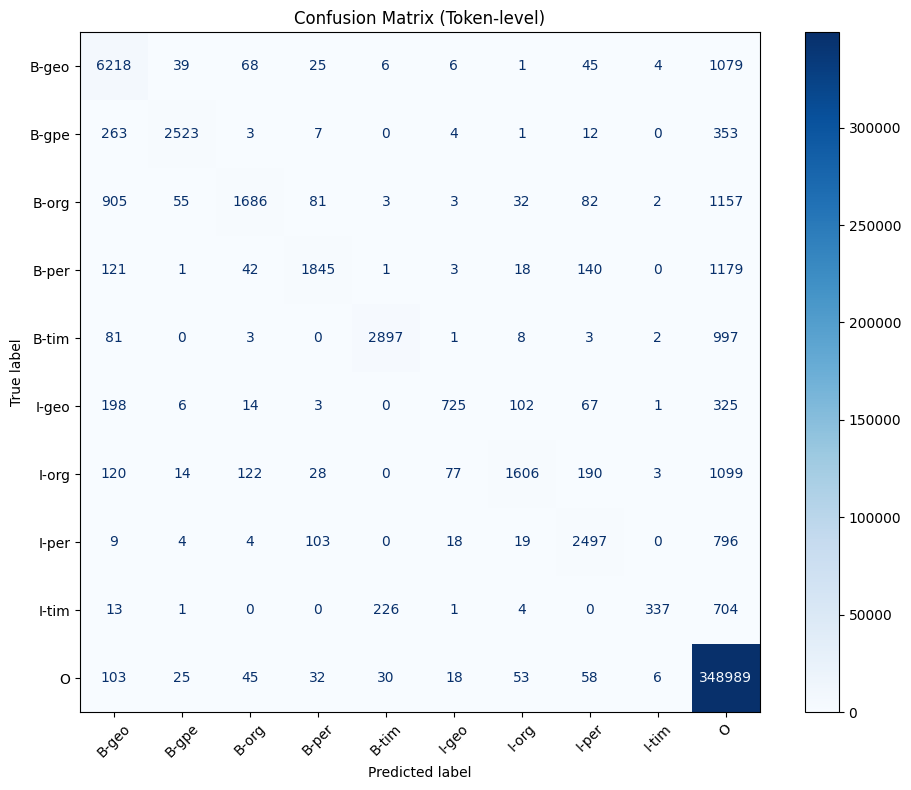

In [139]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get the sorted list of unique labels (excluding PAD)
unique_labels = sorted(set(all_true) | set(all_pred))

# Compute the confusion matrix
cm = confusion_matrix(all_true, all_pred, labels=unique_labels)

# Display as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(xticks_rotation=45, cmap='Blues', ax=ax)
plt.title("Confusion Matrix (Token-level)")
plt.tight_layout()
plt.show()


In [118]:
print(seq_report([all_true], [all_pred]))

              precision    recall  f1-score   support

         geo       0.74      0.80      0.77      7491
         gpe       0.95      0.80      0.86      3166
         org       0.57      0.36      0.44      4006
         per       0.61      0.48      0.54      3350
         tim       0.82      0.66      0.73      3992

   micro avg       0.74      0.64      0.69     22005
   macro avg       0.74      0.62      0.67     22005
weighted avg       0.73      0.64      0.68     22005



In [121]:
from sklearn.metrics import classification_report, accuracy_score

# This will include every label present in all_true/pred,
# including "O" and "<PAD>" if you didn’t filter them out.
print(classification_report(all_true, all_pred, digits=4))

# And overall token-level accuracy:
print("Token-level accuracy:", accuracy_score(all_true, all_pred))


              precision    recall  f1-score   support

       B-geo     0.7742    0.8301    0.8012      7491
       B-gpe     0.9457    0.7969    0.8649      3166
       B-org     0.8485    0.4209    0.5627      4006
       B-per     0.8686    0.5507    0.6741      3350
       B-tim     0.9159    0.7257    0.8098      3992
       I-geo     0.8470    0.5031    0.6313      1441
       I-org     0.8709    0.4928    0.6294      3259
       I-per     0.8070    0.7238    0.7631      3450
       I-tim     0.9493    0.2621    0.4107      1286
           O     0.9784    0.9989    0.9886    349359

    accuracy                         0.9699    380800
   macro avg     0.8806    0.6305    0.7136    380800
weighted avg     0.9681    0.9699    0.9663    380800

Token-level accuracy: 0.969860819327731


In [247]:
device

device(type='cuda')

In [177]:
def predict_sentence(sentence, model, word2id, id2label, max_len=40, device='cpu'):
    model.eval()

    # Tokenize (assume already split, or use a tokenizer if needed)
    tokens = sentence.split()  # e.g., "Barack Obama was born in Hawaii ."

    # Encode
    unk_id = word2id.get('<UNK>', 0)
    pad_id = word2id.get('<PAD>', 0)
    input_ids = [word2id.get(tok, unk_id) for tok in tokens]

    # Save true length
    seq_len = len(input_ids)

    # Pad
    if len(input_ids) < max_len:
        input_ids += [pad_id] * (max_len - len(input_ids))
    else:
        input_ids = input_ids[:max_len]
        seq_len = max_len

    # Convert to tensor
    input_tensor = torch.tensor([input_ids], dtype=torch.long)
    lengths_tensor = torch.tensor([seq_len], dtype=torch.long)


    # Predict
    with torch.inference_mode():
        logits = model(input_tensor, lengths_tensor)  # (1, S, C)

        preds = torch.argmax(logits, dim=-1)          # (1, S)

    pred_ids = preds[0][:seq_len].cpu().numpy()
    pred_labels = [id2label[i] for i in pred_ids]

    # Output
    print(f"{'Token':15} {'Prediction'}")
    print("-" * 30)
    for tok, label in zip(tokens, pred_labels):
        print(f"{tok:15} {label}")


In [187]:
word2id["Barack"]

852

In [192]:
predict_sentence("Barack Obama was born in Hawaii .", model, word2id, id2label, max_len=40, device=device)


Token           Prediction
------------------------------
Barack          B-per
Obama           B-per
was             O
born            O
in              O
Hawaii          B-geo
.               O


In [196]:
torch.save(model.state_dict(), "model_BILSTM_Softmax.pt")

### Implement using CRF

In [3]:
! pip install TorchCRF

In [8]:
from TorchCRF import CRF

In [9]:
class BiLSTMTagger_CRF(torch.nn.Module):
    def __init__(self,
                 tagset_size: int,
                 embedding_dim: int = 200,
                 hidden_dim: int = 128,
                 num_layers: int = 1,
                 dropout: float = 0.3,
                 pad_idx: int = 0):  #pad_idx = vocab["<pad>"]
        super().__init__()  # python 3+ , if python 2+ then , super(BiLSTMTagger,self)

        self.embedding = nn.Embedding(VOCAB_SIZE, embedding_dim, padding_idx=pad_idx)
        self.lstm = nn.LSTM(
            input_size=embedding_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            bidirectional=True,  ## hidden backward + hidden forward (h_tf+ h_tb)  # single then remove 2 ,

            batch_first=True,
            dropout=dropout if num_layers > 1 else 0.0
        )

        self.dropout = nn.Dropout(dropout)
        # each time step we pass the output of LSTM to a fully connected layer
        self.fc = nn.Linear(hidden_dim *2, tagset_size) # tagset_size = 10
        self.crf = CRF(tagset_size, batch_first = True)

    def forward(self, x: torch.LongTensor,lengths: torch.LongTensor):
        # exercice: put the shape of each layer
        emb = self.embedding(x)  # (B,S,E_dim)
        # Pack to let LSTM skip the padded tokens
        # there are some sequences whose lengths are greater than 40(padding sequence)
        lengths = torch.clamp(lengths, max = x.size(1))

        packed = pack_padded_sequence(emb, lengths.cpu(), batch_first=True, enforce_sorted=False) #(T_total, Emb) (sum of actual sequence length)
        # LSTM
        packed_out,_ = self.lstm(packed)  # (T_total,Hidden_dimension*2(2H)) Hidden state for each time step  # Pytorch initialize the initial state to zero
        lstm_out,_ = pad_packed_sequence(packed_out, batch_first=True, total_length=x.size(1))  # (B,S,2H) Ignore o, c, etc

        out = self.dropout(lstm_out)  #(B,S,2H)
        emissions = self.fc(out) #(B,S,C)
        mask = (x != self.pad_idx)
        if tags is not None:
            # compute CRF negative log-likelihood
            #crf returns log-likelihood, so we negate and average
            nll = -self.crf(emissions, tags, mask=mask, reduction='mean')
            return nll
        else:
            # decode best paths
            # returns List[List[int]] of length B, each a seq of tags
            return self.crf.decode(emissions, mask=mask)


In [10]:
model_CRF = BiLSTMTagger_CRF(tagset_size=TAGSET_SIZE,
                     embedding_dim=200,
                     hidden_dim=128,
                     num_layers=1,
                     dropout=0.3,
                     pad_idx=PAD_IDX,
                     vocab_size=VOCAB_SIZE)


NameError: name 'TAGSET_SIZE' is not defined

In [ ]:
from tqdm import tqdm
import torch

torch.manual_seed(42)

for epoch in range(NUM_EPOCHS):
    model_CRF.train()
    train_loss = 0.0

    for batch_tokens, batch_tags, lengths in loader_train:
        batch_tokens = batch_tokens.to(device)
        lengths      = lengths.to(device)
        batch_tags   = batch_tags.to(device)

        optimizer.zero_grad()
        # --- CRF training call returns scalar loss ---
        loss = model_CRF(batch_tokens, lengths, tags=batch_tags)
        with torch.autograd.set_detect_anomaly(True):
            loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss_avg = train_loss / len(loader_train)

    # --- Validation ---
    val_loss  = 0.0
    val_acc   = 0.0
    model_CRF.eval()
    with torch.inference_mode():
        for tokens, tags, lengths_valid in loader_valid:
            tokens         = tokens.to(device)
            tags           = tags.to(device)
            lengths_valid  = lengths_valid.to(device)

            # 1) Compute validation loss via CRF
            val_loss += model_CRF(tokens, lengths_valid, tags=tags).item()

            # 2) Decode best paths for accuracy
            pred_seqs = model_CRF(tokens, lengths_valid)
            # pred_seqs: List of length B, each a list of tag-indices

            # Convert pred_seqs → tensor padded to (B, S):
            # (you can also compute accuracy per sequence)
            max_len = tokens.size(1)
            batch_pred = torch.zeros_like(tags)
            for i, seq in enumerate(pred_seqs):
                batch_pred[i, :len(seq)] = torch.tensor(seq, device=device)

            # Use your existing accuracy fn that masks PAD_IDX
            val_acc += accuracy(batch_pred, tags, pad_idx=PAD_IDX)

    valid_loss_avg    = val_loss / len(loader_valid)
    valid_accuracy_avg = val_acc  / len(loader_valid)

    print(
      f"Epoch {epoch+1} — "
      f"Train_Loss: {train_loss_avg:.4f}, "
      f"Valid_Loss: {valid_loss_avg:.4f}, "
      f"Accuracy_valid: {valid_accuracy_avg:.4f}"
    )

    with open("training_log.txt", "a") as f:
        f.write(
          f"Epoch {epoch+1} — "
          f"Train_Loss: {train_loss_avg:.4f}, "
          f"Valid_Loss: {valid_loss_avg:.4f}, "
          f"Accuracy_valid: {valid_accuracy_avg:.4f}\n"
        )

    early_stopping(valid_loss_avg, model_CRF)
    if early_stopping.early_stop:
        print("Early stopping")
        break

# load best CRF model
early_stopping.load_best_model(model_CRF)


### Challenge

Some of the tokens tested are not seen by the model during training. Furthermore, we can use pretrained model that solve NER task like BERT(Spacy), and then fine tune after so that the model can be specialized.
If the word is not in the word2id, we can calculate similarity with the word in word2id , and add the entity to it if it has high similarity score

### Use pretrained embedding


We encounter OOV(out-of-verb) problem  

### Word2Vec

We need to use : GoogleNews-vectors-negative300.bin.gz
Corpus that has 100 billion words. It uses the skip gram Word2Vec model. It uses negative sampling. Each word is represented by a 300 dimension vector.

In [235]:
from gensim.models import Word2Vec
import gensim
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings # to prevent displaying any warnings
from gensim.models import KeyedVectors
import gensim.downloader as api

In [214]:
! wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2025-07-02 10:18:42--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 16.15.193.236, 3.5.22.245, 16.15.179.50, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|16.15.193.236|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-07-02 10:18:42 ERROR 404: Not Found.



In [ ]:
from gensim.models import KeyedVectors

# Load the binary Word2Vec model (takes time & memory ~1.5GB RAM)
word2vec = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)


In [201]:
import numpy as np

embedding_dim = 300
vocab_size = len(word2id)

# Initialize embedding matrix with random values
embedding_matrix = np.random.uniform(-0.25, 0.25, (vocab_size, embedding_dim)).astype(np.float32)

for word, idx in word2id.items():
    if word in word2vec:
        embedding_matrix[idx] = word2vec[word]


NameError: name 'word2vec' is not defined

In [217]:
embedding_matrix[word2id['<PAD>']] = np.zeros(embedding_dim)


In [203]:
self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)
self.embedding.weight.data.copy_(torch.from_numpy(embedding_matrix))
self.embedding.weight.requires_grad = True  # or False if you want to freeze it


NameError: name 'pad_idx' is not defined

### Use Glove: add pretrained weight to the model to enhance performance

Wikipedia 2014 + Gigaword 5 (6B tokens, 400K vocab, uncased, 50d, 100d, 200d, & 300d vectors, 822 MB download

In [218]:
!wget https://nlp.stanford.edu/data/glove.6B.zip


--2025-07-02 10:37:59--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-07-02 10:37:59--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.02MB/s    in 2m 39s  

2025-07-02 10:40:39 (5.16 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [219]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [246]:
def load_glove_embeddings(glove_file_path):
    embeddings = {}
    with open(glove_file_path, 'r', encoding='utf8') as f:
        for line in f:
            parts = line.strip().split()
            word = parts[0]
            vec = np.array(parts[1:], dtype=np.float32)
            embeddings[word] = vec
    return embeddings

glove_path = "glove.6B.300d.txt"
glove_embeddings = load_glove_embeddings(glove_path)

In [249]:
embedding_dim = 300
vocab_size = len(word2id)

In [248]:
embedding_dict = {}

In [230]:
for word, idx in word2id.items():
    if word in glove_embeddings:
        embedding_dict[word] = glove_embeddings[word]
    else:

        embedding_dict[word] = np.random.uniform(-0.25, 0.25, embedding_dim).astype(np.float32)


In [232]:
not_found_count = 0
not_found_words = []

for word in word2id:
    if word not in glove_embeddings:
        not_found_count += 1
        not_found_words.append(word)

print(f"❗ Words not found in GloVe: {not_found_count} / {len(word2id)}")


❗ Words not found in GloVe: 13478 / 30523


### Training using Glove 300d

In [250]:
len(word2id)

30523

In [251]:
vocab_size = len(word2id)
embedding_matrix = np.random.uniform(-0.25, 0.25, (vocab_size, embedding_dim)).astype(np.float32)


for word, idx in word2id.items():
    if word in glove_embeddings:
        embedding_matrix[idx] = glove_embeddings[word]

embedding_matrix[word2id["<PAD>"]] = np.zeros(embedding_dim)
embedding_matrix[word2id["<UNK>"]] = np.mean(list(glove_embeddings.values()), axis=0)


In [313]:
embedding_matrix.shape[0]

30523

In [319]:
class BiLSTMTagger_Glove(torch.nn.Module):
    def __init__(self,
                 tagset_size: int,
                 vocab_size:int = embedding_matrix.shape[0],
                 embedding_dim = embedding_matrix.shape[1],
                 hidden_dim: int = 128,
                 num_layers: int = 1,
                 dropout: float = 0.3,
                 pad_idx: int = 0,
                 pretrained_weights =None):  #pad_idx = vocab["<pad>"]
        super().__init__()  # python 3+ , if python 2+ then , super(BiLSTMTagger,self)

        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)

        if pretrained_weights is not None:
          self.embedding.weight.data.copy_(torch.from_numpy(pretrained_weights))
          self.embedding.weight.requires_grad = False #allow fine-tuning

        self.lstm = nn.LSTM(
            input_size=embedding_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            bidirectional=True,  ## hidden backward + hidden forward (h_tf+ h_tb)  # single then remove 2 ,

            batch_first=True,
            dropout=dropout if num_layers > 1 else 0.0
        )


        self.dropout = nn.Dropout(dropout)
        # each time step we pass the output of LSTM to a fully connected layer
        self.fc = nn.Linear(hidden_dim *2, tagset_size) # tagset_size = 10
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x: torch.LongTensor,lengths: torch.LongTensor):
        # exercice: put the shape of each layer
        emb = self.embedding(x)  # (B,S,E_dim)
        # Pack to let LSTM skip the padded tokens
        # there are some sequences whose lengths are greater than 40(padding sequence)
        lengths = torch.clamp(lengths, max = x.size(1))

        packed = pack_padded_sequence(emb, lengths.cpu(), batch_first=True, enforce_sorted=False) #(T_total, Emb) (sum of actual sequence length)
        # LSTM
        packed_out,_ = self.lstm(packed)  # (T_total,Hidden_dimension*2(2H)) Hidden state for each time step  # Pytorch initialize the initial state to zero
        lstm_out,_ = pad_packed_sequence(packed_out, batch_first=True, total_length=x.size(1))  # (B,S,2H) Ignore o, c, etc

        out = self.dropout(lstm_out)  #(B,S,2H)
        logits = self.fc(out) #(B,S,C)
        return logits

In [320]:
vocab_size

30523

In [325]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_glove = BiLSTMTagger_Glove(TAGSET_SIZE,pretrained_weights=embedding_matrix).to(device)
criterion = nn.CrossEntropyLoss(ignore_index= PAD_IDX)
#nn.CrossEntropyLoss—it expects raw logits and internally does a log_softmax followed by an NLL loss.
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay= 5e-4)

In [326]:
model_glove

BiLSTMTagger_Glove(
  (embedding): Embedding(30523, 300, padding_idx=0)
  (lstm): LSTM(300, 128, batch_first=True, bidirectional=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=11, bias=True)
  (softmax): Softmax(dim=-1)
)

In [327]:
from tqdm import tqdm
torch.manual_seed(42)

for epoch in range(NUM_EPOCHS):
    model_glove.train()

    train_loss = 0.0
    for batch_tokens, batch_tags, lengths in loader_train :  # tuple from the collate_fn function
        batch_tokens = batch_tokens.to(device) #unecessary here since it is automatic
        lengths = lengths.to(device)
        batch_tags = batch_tags.to(device)


        optimizer.zero_grad()

        # Forward pass
        logits = model_glove(batch_tokens,lengths)  # (B, S, C)  C = 10

        # Flatten logits and targets for loss computation
        logits = logits.reshape(-1, logits.size(-1))  # (B*S, C)
        batch_tags = batch_tags.view(-1) #true value             # (B*S)
        # Compute loss
        loss = criterion(logits, batch_tags)
        # Backpropagation with anomaly detection
        with torch.autograd.set_detect_anomaly(True):
            loss.backward()

        optimizer.step()
        train_loss += loss.item()


    train_loss_avg = train_loss/len(loader_train) #number of batch
    #test on validation dataset
    val_loss = 0.0
    valid_accuracy = 0

    model_glove.eval()
    with torch.inference_mode():
        for tokens, tags, lengths_valid in loader_valid:
            tokens = tokens.to(device)
            tags = tags.to(device)
            lengths_valid = lengths_valid.to(device)

            output = model_glove(tokens,lengths_valid)  #shape (B,S,C)
            output_flat = output.view(-1,output.size(-1))  #(B*S,C)
            tags_flat = tags.view(-1)  # shape (B*S,)
            loss = criterion(output_flat,tags_flat)
            val_loss += loss.item()
            prediction_valid = torch.argmax(output,dim =-1)
            valid_accuracy += accuracy(prediction_valid,tags,pad_idx = PAD_IDX)


    valid_accuracy_avg = valid_accuracy/len(loader_valid)
    valid_loss_avg = val_loss/len(loader_valid)
    print(f"Epoch {epoch+1} — Train_Loss: {train_loss_avg:.4f}, Valid_Loss: {valid_loss_avg:.4f}, Accuracy_valid: {valid_accuracy_avg:.4f}")
    with open("training_log.txt", "a") as f:
        f.write(f"Epoch {epoch+1} — Train_Loss: {train_loss_avg:.4f}, Valid_Loss: {valid_loss_avg:.4f}, Accuracy_valid: {valid_accuracy_avg:.4f}\n")
    early_stopping(valid_loss_avg, model_glove)
    if early_stopping.early_stop:
        print("Early stopping")
        break

early_stopping.load_best_model(model_glove)



Epoch 1 — Train_Loss: 2.3175, Valid_Loss: 2.3285, Accuracy_valid: 0.6976
Early stopping


In [324]:
num_zeros = np.sum(np.all(embedding_matrix == 0, axis=1))
print(f"{num_zeros} out of {embedding_matrix.shape[0]} embeddings are all zeros.")


1 out of 30523 embeddings are all zeros.
